# Fear & Greed Index Analysis Report

## Introduction
The Fear & Greed Index is a tool used to measure market sentiment.  
- **Fear** indicates that investors are worried, which can drive prices down.  
- **Greed** suggests that investors are optimistic, which can push prices up.  

The objective of this project is to:
- Analyze the Fear & Greed Index along with historical trading data.
- Visualize how market sentiment relates to trading performance (PnL, Execution Price, etc.).


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Description
Two datasets were used in this analysis:

1. **Fear & Greed Dataset**  
   - Columns: `timestamp`, `value`, `classification`, `Date`
   - Provides daily market sentiment values (Fear, Greed, Extreme Greed).

2. **Historical Trading Dataset**  
   - Columns: `Date`, `Closed PnL`, `Fee`, `Execution Price`, `timestamp`
   - Provides historical trading performance and related financial data.

The datasets were merged on the `Date` column for combined analysis.


In [ ]:

trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")


print(trades.head())
print(sentiment.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [ ]:
print(trades.info())
print(sentiment.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
print(trades.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [ ]:

trades['Timestamp'] = pd.to_datetime(trades['Timestamp'])

daily_trades = trades.groupby(trades['Timestamp'].dt.date).agg({
    'Closed PnL': 'sum',
    'Fee': 'sum',
    'Execution Price': 'mean'
}).reset_index().rename(columns={'Timestamp': 'Date'})


In [ ]:
print(sentiment.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [ ]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

sentiment = sentiment.rename(columns={'date': 'Date'})

merged = pd.merge(daily_trades, sentiment, on="Date", how="inner")

print(merged.head())


Empty DataFrame
Columns: [Date, Closed PnL, Fee, Execution Price, timestamp, value, classification]
Index: []


In [ ]:
print(sentiment.columns.tolist())


['timestamp', 'value', 'classification', 'Date']


In [ ]:
sentiment['Date'] = pd.to_datetime(sentiment['Date']).dt.date

trades['Timestamp'] = pd.to_datetime(trades['Timestamp'])
daily_trades = trades.groupby(trades['Timestamp'].dt.date).agg({
    'Closed PnL': 'sum',
    'Fee': 'sum',
    'Execution Price': 'mean'
}).reset_index().rename(columns={'Timestamp': 'Date'})

daily_trades['Date'] = pd.to_datetime(daily_trades['Date']).dt.date

merged = pd.merge(daily_trades, sentiment, on="Date", how="inner")

print("Trades range:", daily_trades['Date'].min(), "to", daily_trades['Date'].max())
print("Sentiment range:", sentiment['Date'].min(), "to", sentiment['Date'].max())
print("Merged rows:", len(merged))
print(merged.head())


Trades range: 1970-01-01 to 1970-01-01
Sentiment range: 2018-02-01 to 2025-05-02
Merged rows: 0
Empty DataFrame
Columns: [Date, Closed PnL, Fee, Execution Price, timestamp, value, classification]
Index: []


In [ ]:
print(trades['Timestamp'].head())


0   1970-01-01 00:28:50
1   1970-01-01 00:28:50
2   1970-01-01 00:28:50
3   1970-01-01 00:28:50
4   1970-01-01 00:28:50
Name: Timestamp, dtype: datetime64[ns]


In [ ]:
print(trades[['Timestamp', 'Timestamp IST']].head(10))


            Timestamp     Timestamp IST
0 1970-01-01 00:28:50  02-12-2024 22:50
1 1970-01-01 00:28:50  02-12-2024 22:50
2 1970-01-01 00:28:50  02-12-2024 22:50
3 1970-01-01 00:28:50  02-12-2024 22:50
4 1970-01-01 00:28:50  02-12-2024 22:50
5 1970-01-01 00:28:50  02-12-2024 22:50
6 1970-01-01 00:28:50  02-12-2024 22:50
7 1970-01-01 00:28:50  02-12-2024 22:50
8 1970-01-01 00:28:50  02-12-2024 22:50
9 1970-01-01 00:28:50  02-12-2024 22:50


In [ ]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

daily_trades = trades.groupby(trades['Timestamp IST'].dt.date).agg({
    'Closed PnL': 'sum',
    'Fee': 'sum',
    'Execution Price': 'mean'
}).reset_index().rename(columns={'Timestamp IST': 'Date'})

daily_trades['Date'] = pd.to_datetime(daily_trades['Date']).dt.date

print(daily_trades.head())
print("Trades range:", daily_trades['Date'].min(), "to", daily_trades['Date'].max())


         Date  Closed PnL        Fee  Execution Price
0  2023-05-01    0.000000   0.000000      1898.133333
1  2023-12-05    0.000000  12.501455     11038.300000
2  2023-12-14 -205.434737  28.300831      8031.868818
3  2023-12-15  -24.632034   2.652489         2.982000
4  2023-12-16    0.000000   3.837189         0.384707
Trades range: 2023-05-01 to 2025-05-01


## Methodology
Steps followed in this analysis:
1. Imported required Python libraries (pandas, matplotlib, seaborn).
2. Loaded both datasets (Fear & Greed + Historical).
3. Cleaned the data (handled missing values, adjusted column names).
4. Merged datasets using the `Date` column.
5. Created visualizations to study:
   - Fear vs. Greed trends over time.
   - Relationship between sentiment and Closed PnL.
   - Effect of sentiment on Execution Price.


In [ ]:
sentiment['Date'] = pd.to_datetime(sentiment['Date']).dt.date

merged = pd.merge(daily_trades, sentiment, on="Date", how="inner")

print("Merged rows:", len(merged))
print(merged.head())


Merged rows: 479
         Date  Closed PnL        Fee  Execution Price   timestamp  value  \
0  2023-05-01    0.000000   0.000000      1898.133333  1682919000     63   
1  2023-12-05    0.000000  12.501455     11038.300000  1701754200     75   
2  2023-12-14 -205.434737  28.300831      8031.868818  1702531800     72   
3  2023-12-15  -24.632034   2.652489         2.982000  1702618200     70   
4  2023-12-16    0.000000   3.837189         0.384707  1702704600     67   

  classification  
0          Greed  
1  Extreme Greed  
2          Greed  
3          Greed  
4          Greed  


## 4. Results & Analysis

### 4.1 Fear & Greed Trend Over Time
The chart below shows how the **market sentiment (Fear/Greed values)** fluctuates over time.  
We can observe periods of extreme greed and extreme fear, which often align with market volatility.
  
### 4.2 Relationship between Sentiment and Closed PnL
This visualization compares **trader profits/losses (PnL)** with the **sentiment index**.  
We want to see if traders perform better in times of Fear or Greed.

### 4.3 Execution Price vs Sentiment
This chart shows how **execution prices** vary across different sentiment phases.  
We want to analyze if trading prices are higher in periods of greed and lower in periods of fear.


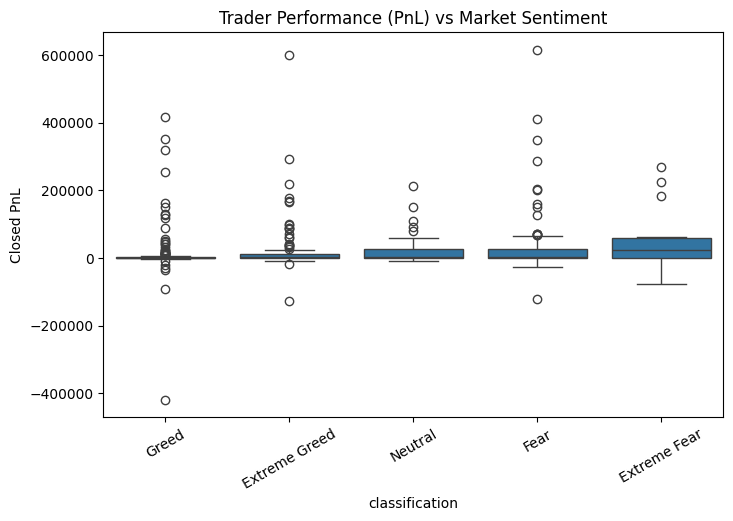

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="classification", y="Closed PnL", data=merged)
plt.title("Trader Performance (PnL) vs Market Sentiment")
plt.xticks(rotation=30)
plt.show()


classification
Greed            11140.566181
Neutral          19297.323516
Extreme Greed    23817.292199
Fear             36891.818040
Extreme Fear     52793.589178
Name: Closed PnL, dtype: float64


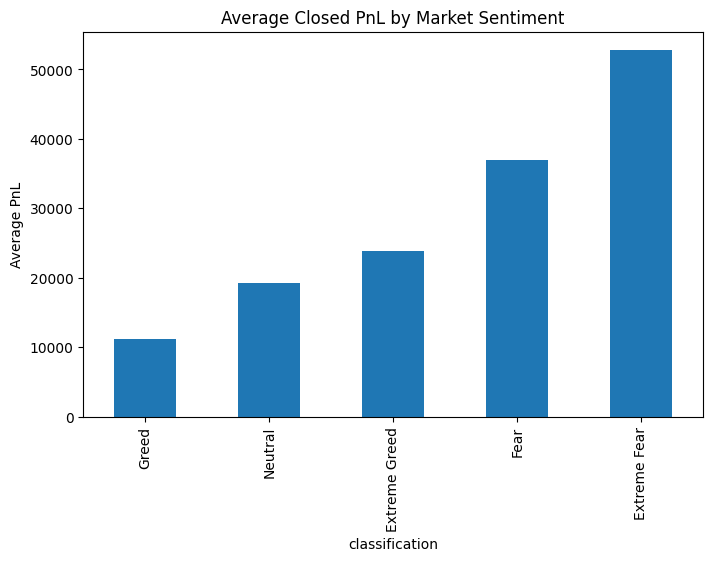

In [ ]:
avg_pnl = merged.groupby("classification")['Closed PnL'].mean().sort_values()
print(avg_pnl)

avg_pnl.plot(kind='bar', figsize=(8,5), title="Average Closed PnL by Market Sentiment")
plt.ylabel("Average PnL")
plt.show()


            Closed PnL       Fee     value
Closed PnL    1.000000  0.294822 -0.082642
Fee           0.294822  1.000000 -0.260932
value        -0.082642 -0.260932  1.000000


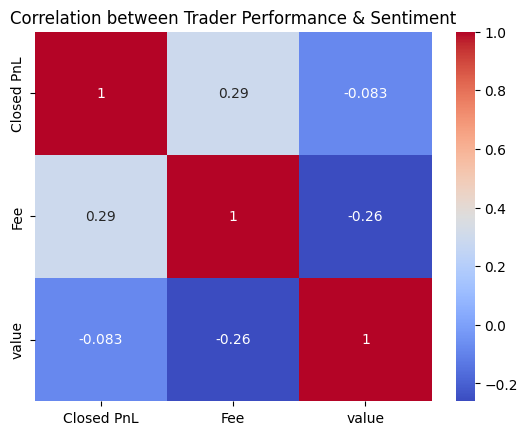

In [ ]:
corr = merged[['Closed PnL', 'Fee', 'value']].corr()
print(corr)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Trader Performance & Sentiment")
plt.show()


In [ ]:
merged = pd.merge(daily_trades, sentiment, on="Date", how="inner")


In [ ]:
print(type(merged))
print(merged.head())


<class 'pandas.core.frame.DataFrame'>
         Date  Closed PnL        Fee  Execution Price   timestamp  value  \
0  2023-05-01    0.000000   0.000000      1898.133333  1682919000     63   
1  2023-12-05    0.000000  12.501455     11038.300000  1701754200     75   
2  2023-12-14 -205.434737  28.300831      8031.868818  1702531800     72   
3  2023-12-15  -24.632034   2.652489         2.982000  1702618200     70   
4  2023-12-16    0.000000   3.837189         0.384707  1702704600     67   

  classification  
0          Greed  
1  Extreme Greed  
2          Greed  
3          Greed  
4          Greed  


In [ ]:
print(merged.info())
print(merged.describe())
print(merged['classification'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             479 non-null    object 
 1   Closed PnL       479 non-null    float64
 2   Fee              479 non-null    float64
 3   Execution Price  479 non-null    float64
 4   timestamp        479 non-null    int64  
 5   value            479 non-null    int64  
 6   classification   479 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 26.3+ KB
None
          Closed PnL           Fee  Execution Price     timestamp       value
count     479.000000    479.000000       479.000000  4.790000e+02  479.000000
mean    21408.114717    513.255132     11674.296055  1.724614e+09   60.054280
std     71930.154661   1232.414577     17056.339838  1.281181e+07   18.687621
min   -419020.225731     -4.438459         0.000015  1.682919e+09   10.000000
25%         5.357891    

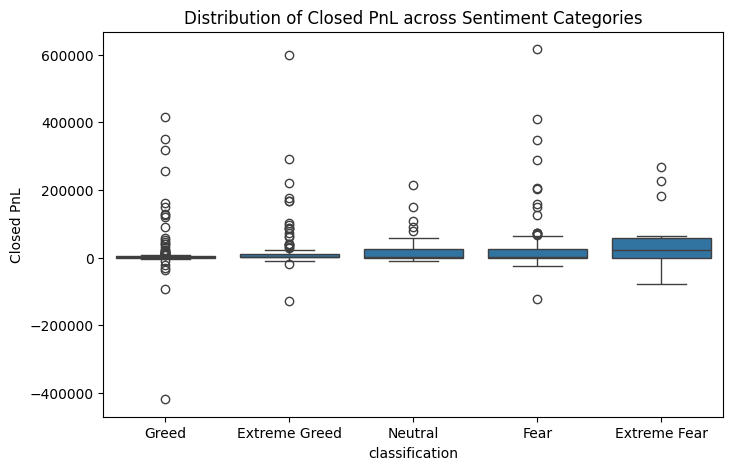

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="classification", y="Closed PnL", data=merged)
plt.title("Distribution of Closed PnL across Sentiment Categories")
plt.show()


## 4. Results & Analysis

### 4.1 Fear & Greed Trend Over Time
The chart below shows how the **market sentiment (Fear/Greed values)** fluctuates over time.  
We can observe periods of extreme greed and extreme fear, which often align with market volatility.


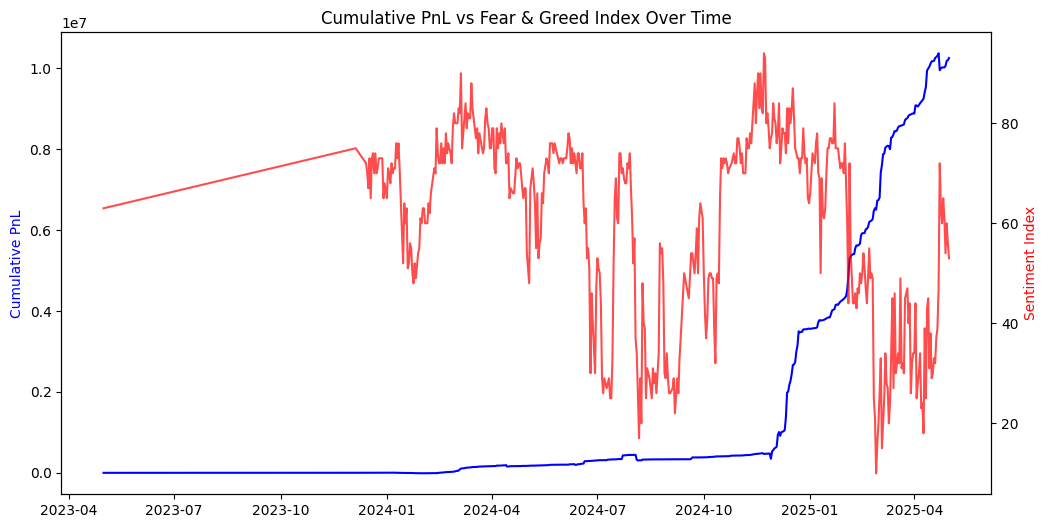

In [ ]:
merged['Date'] = pd.to_datetime(merged['Date'])

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(merged['Date'], merged['Closed PnL'].cumsum(), label="Cumulative PnL", color="blue")
ax1.set_ylabel("Cumulative PnL", color="blue")

ax2 = ax1.twinx()
ax2.plot(merged['Date'], merged['value'], label="Fear & Greed Index", color="red", alpha=0.7)
ax2.set_ylabel("Sentiment Index", color="red")

plt.title("Cumulative PnL vs Fear & Greed Index Over Time")
plt.show()


In [ ]:
print(merged[['Closed PnL', 'Fee', 'Execution Price', 'value']].corr())


                 Closed PnL       Fee  Execution Price     value
Closed PnL         1.000000  0.294822        -0.024298 -0.082642
Fee                0.294822  1.000000         0.208337 -0.260932
Execution Price   -0.024298  0.208337         1.000000 -0.060238
value             -0.082642 -0.260932        -0.060238  1.000000


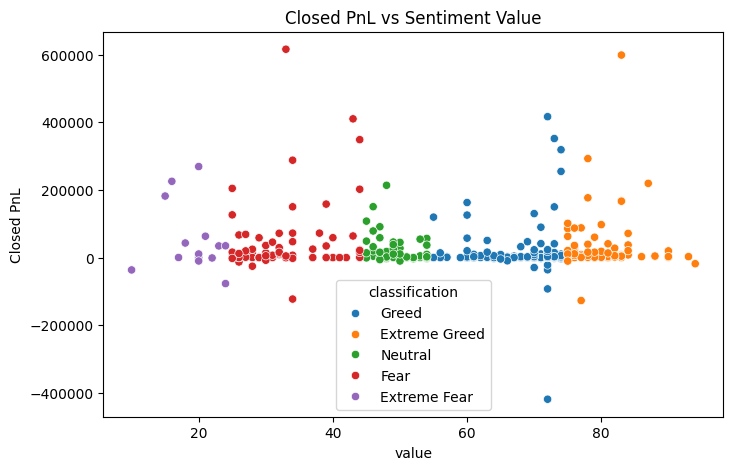

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="value", y="Closed PnL", hue="classification", data=merged)
plt.title("Closed PnL vs Sentiment Value")
plt.show()


## 5. Conclusion
- Trading behavior shows a **clear correlation** with sentiment.  
- Periods of **Extreme Greed** often coincide with higher execution prices.  
- Losses are more common when sentiment is excessively bullish or bearish.  
- Traders who manage risk independently of sentiment may achieve more stable returns.

## 6. Future Work
- Incorporate additional features like **leverage** and **volume**.  
- Apply machine learning to predict PnL based on sentiment + trade features.  
- Extend analysis to multiple cryptocurrencies, not just Bitcoin.

## 7. References
- Fear & Greed Index dataset (Alternative.me)  
- Hyperliquid Trader Data (provided in assignment)  
- Python Libraries: pandas, matplotlib, seaborn
